# Start Here: A Gentle Introduction - First Try

## 1. Introduction: Home Credit Default Risk Competition

이 대회의 목적은 **과거 대출 이력으로 대출을 받은 고객이 상환할 능력이 있는지**를 예측하는 것이다. 이 문제는 지도학습 분류(supervised classification) 문제라 볼 수 있다.
* *Supervised* : label이 trainset에 있고 모델을 학습하여 feature로부터 label을 예측하는 문제
* *Classification* : label이 binary variable인 경우

### 1.1. Data
이 데이터는 은행을 이용하지 않는 고객들에게 신용대출(credit loans)를 제공하는 서비스인 *Home Credit*이 제공하였고 총 7개의 다른 데이터가 제공된다.
* **application_train/application_test**
    - *Home Credit*에서 각 대출 신청에 대한 main trainset과 testset
    - 대출 기록이 row이고 `SK_ID_CURR`로 구분됨
    - trainset의 `TARGET`의 0은 대출상환을, 1은 상환되지 않음을 의미
* **bureau**
    - 다른 금융기관에서의 과거 대출 기록
    - 각각의 대출 기록이 row로 정리되어 있음
    - **application data**의 대출(loan) → 여러개의 이전 신용정보(credit)
* **bereau_balance**
    - 과거 대출들의 월별(monthly) 데이터
    - 각 월별 데이터는 각각의 row로 정리되어 있음
    - 과거 대출기록 한 달에 여러 개일 수 있음
* **previous_application**
    - **application data**에서 대출기록이 있는 고객들이 *Home Credit*에서 신청한 과거 대출기록
    - 현재 대출신청 기록은 여러 개의 과거 대출신청 기록을 가지고 있을 수 있음
    - 과거 대출신청 기록은 row로 정리되어 있으며 `SK_ID_PREV`로 구분됨
* **POS_CASH_BALANCE**
    - *Home Credit*에서 과거 매매 또는 현금 차관들의 월별(monthly) 데이터
    - 각 월별 데이터는 각각의 row로 정리되어 있음
    - 하나의 과거 대출기록은 여러 개의 row를 가질 수 있음
* **credit_card_balance**
    - 고객의 *Home Credit* 과거 신용카드의 월별 데이터
    - 월별 신용카드 잔고가 row로 정리되어 있음
    - 하나의 신용카드가 여러 개의 row를 가질 수 있음
* **installments_payment**
    - *Home Credit*에 과거 대출상환 내역
    - 매 지불금마다 row가 있고, 매 미납금마다도 row가 있음

<br>

![dataset-diagram](../img/home-credit.png)

###  1.2. Metric: ROC AUC
이 대회에서는 평가지표로 가장 흔히 쓰이는 분류기의 기준인 **ROC AUC(Receiver Operating Characteristic Area Under the Curve)**를 사용한다. ROC 곡선은 *true-positive 대 false-positive 비율*을 나타낸다.

![roc-auc](../img/roc-auc.png)

곡선 하나는 각 모델을 나타내며, 선을 따라 이동함은 positive 데이터를 분류하기 위한 임계값(threshold)이 바뀌는 것을 의미한다. 임계값은 오른쪽 위의 0에서부터 시작해 왼쪽 아래에 있는 1로 바뀐다. **어느 곡선보다 위에 있고 왼쪽에 위치한 모델**이 성능이 좋다. 예를 들어 파란색 모델은 빨간색 모델보다 성능이 좋고 검은색 대각선보다 빨간색 모델이 더 좋다.

AUC는 이름 그대로 *ROC 곡선 아래의 면적*을 뜻한다. 이 지표는 0과 1사이의 값이며 값이 높을수록 모델의 성능이 좋다. 예를들어 임의로 값을 예측하는 검은색 모델의 ROC-AUC는 0.5이다.

ROC-AUC로 모델을 측정할 때, 단순히 0 또는 1로 예측하는 게 아니라 0과 1사이의 확률로 예측한다. 불균형한 클래스에서는 정확도는 그리 좋은 지표가 아니다. 그래서 **두 클래스 간의 균형을 나타내는 ROC-AUC나 F1 score 같은 더 진보된 지표**를 사용하여 *분류기 모델의 성능*을 측정한다. ROC-AUC가 높은 모델은 정확도도 높지만, 모델의 성능을 더 잘 표현하기 위해서는 ROC-AUC를 사용하는 게 좋다.

> 자세한 내용은 [여기](https://datascience.stackexchange.com/questions/806/advantages-of-auc-vs-standard-accuracy)를 참고!

## 2. Imports

In [1]:
# data manipulation
import numpy as np
import pandas as pd

# dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# file system management
import os

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Read in Data
이 Notebook은 Machine Learning Tutorial을 위해 모든 데이터셋을 다 쓰지 않고 main 데이터셋만 활용할 예정
* **application_train**, **application_test**, **submission**만 사용

In [2]:
print(os.listdir('../data/'))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [3]:
# train data
app_train = pd.read_csv('../data/application_train.csv')
print('training data shape :', app_train.shape)
app_train.head()

training data shape : (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


train data는 대출기록을 의미하는 307511개의 데이터가 있으며 `TARGET`을 포함하여 총 122개의 feature를 갖고있다.

In [4]:
# test data
app_test = pd.read_csv('../data/application_test.csv')
print('testing data shape :', app_test.shape)
app_test.head()

testing data shape : (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


test data는 train data보다 데이터 양이 적고 `TARGET`을 갖고 있지 않다.

## 4. Exploratory Data Analysis
EDA는 데이터 내의 경향, 이상 징후, 패턴 혹은 관계를 찾기 위해 통계를 내고 figure를 그리는 단계를 말한다. EDA의 목적은 **데이터가 우리에게 말해줄 수 있는 것**을 배우기 위함이다.    
일반적으로 넓은 시각에서 시작해 데이터에서 흥미로운 부분을 발견하면 그 부분으로 영역이 좁혀진다. 그 발견은 그것 자체로도 흥미로울 수 있고, 어떤 feature를 사용할지 결정하는 것을 도와줘 최종 모델 선택을 하는데 사용될 수 있다.

### 4.1. Examine the Distribution of the Target Column
우선 `TARGET`의 각 value의 비율을 살펴보자.

In [5]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

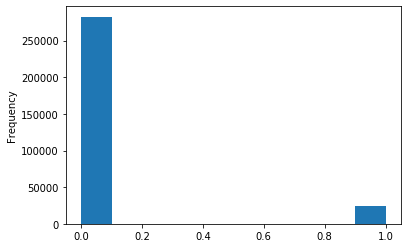

In [6]:
app_train['TARGET'].astype(int).plot.hist()

위의 plot을 통해  상환이 되지 않은 대출보다 상환이 된 대출이 더 많은 것으로 보아 **불균형적인 클래스 문제(imbalanced class problem)**이 있음을 알 수 있다. 나중에 복잡한 모델을 설계하게 되면 이 문제를 해결하기 위해 클래스에 weight를 주어 해결할 수 있다.

### 4.2. Examine Missing Values
각 feature별 missing value의 비율을 살펴보자.

In [17]:
# missing value 비율을 계산
def missing_values_table(df):
    # 전체 missing value개수
    mis_val = df.isnull().sum()

    # missing value 비율
    mis_val_perc = 100 * mis_val / len(df)

    # table 생성
    mis_val_table = pd.concat([mis_val, mis_val_perc], axis=1)

    # column 이름 바꾸기
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'missing values', 1: '% of total values'})

    # missing value 비율을 기준으로 역정렬
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of total values', ascending=False).round(1)
    
    # 요약 출력
    print('your selected dataframe has {} columns.'.format(df.shape[1]))
    print('there are {} columns that have missing values.'.format(mis_val_table_ren_columns.shape[0]))
    
    # missing info에 대한 dataframe 반환
    return mis_val_table_ren_columns

In [18]:
# missing value 통계
missing_values = missing_values_table(app_train)
missing_values.head(30)

your selected dataframe has 122 columns.
there are 67 columns that have missing values.


,missing values,% of total values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


모델을 만들기 전에 우리는 이 missing value들을 채워줘야 한다(=imputation). 나중에 **imputation할 필요가 없이 missing value를 처리하는 XGBoost** 모델을 후에 사용할 것이다. 다른 방법으로는 높은 비율을 가진 feature들은 제거하는 것이다. 일단은 이 feature들을 버리지 않고 가져갈 예정.

### 4.3. Column Types
이번에는 각 column들의 자료형을 살펴보자. `int64`와 `float64`는 numerical variable(discrete하거나 continous함)이며, `object`는 문자열을 포함한 **categorical feature**이다.

In [19]:
# 자료형 별 feature의 개수
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

`object` column 즉, **categorical feature의 unique value의 개수**를 보자.

> **DataFrame.select_dtypes(include=None, exclude=None)**   
> column의 dtype을 기반으로 dataframe의 부분집합(dataframe)을 반환
> * `include/exclude` : 포함/미포함할 dtype 혹은 string값

> **Series.nunique(dropna=True)**    
> unique value의 개수를 반환
> * `dropna` : NaN을 포함하지 않을 건지

In [20]:
# object column의 unique value의 개수
app_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

대부분의 categorical variable이 **비교적 적은 개수의 unique value**를 갖고 있는 걸 볼 수 있다. 나중에 이 categorical variable을 처리할 방법이 필요할 것이다!

### 4.4. Encoding Categorical Variables
그 다음 단계로 가기 전에, 우리는 이 성가신 cateogorical variable을 처리할 필요가 있다. *LightGBM*과 같은 몇몇 모델을 제외하고 머신러닝 모델은 categorical variable을 처리할 수가 없다. 그러므로 우리는 이 variable을 모델에 넣기 전에 **숫자로 encoding하는 방법**을 찾아야 한다. 이 방법으로는 크게 2가지가 있다.

* **Lable Encoding** : 각각의 unique category를 정수(integer)로 변환하는 것. 새로운 column을 만들 필요가 없다.
![label-encoding](../img/label-encoding.png)
* **One-hot Encoding** : 각 unique category만큼 column을 생성하여 해당 value에 해당하는 column은 1을, 아닌 column들에는 0을 할당하는 방법
![one-hot-encoding](../img/one-hot-encoding.png)

*Label Encoding*의 문제는 category에 임의로 순서를 주게 된다는 것이다. 각 category에 할당된 value는 랜덤이고 category 자체에 아무런 영향을 주지 않는다. 하지만 모델은 이 상대적인 값을 가중치로 인식할 수 있다. 만약 `여자/남자`와 같이 unique value가 2개라면은 *Label Encoding*은 괜찮지만, 2개 이상이면 *One-hot Encoding*을 하는 것이 안전한 선택일 것이다.

두 방법의 상대적인 장점에 대한 토론들이 많으며 몇몇 모델은 *Label Encoding*의 단점을 큰 문제없이 잘 해결하기도 한다. 나(저자)는 **많은 class를 가진 categorical variable이라면 category에 임의로 value를 할당하지 않는 _One-hot Encoding_이 가장 안전한 방법**이라 생각한다. _One-hot Encoding_의 유일한 단점이라면 많은 category를 가진 categorical variable의 경우 encoding 후 feature의 개수가 폭발적으로 늘을 수 있다는 점이다. 이 문제를 해결하기 위해 **차원을 낮출 수 있는 PCA나 다른 차원 축소 방식**을 사용하여 _One-hot Encoding_을 할 수 있다.

이 Notebook에서는 **2개의 category를 가진 categorical variable에서는 _Label Encoding_을, 2개 이상의 category를 가진 categorical variable에선 _One-hot Encoding_을 사용**할 것이다. (다만 여기서는 차원축소방식을 사용하지 않을 예정)

#### 4.4.1. Label Encoding and One-Hot Encoding
위에서 말했던 것처럼 `dtype==object`인 2개의 category를 가진 categorical variable은 *Label Ecoding*을 사용하고 2개 이상의 category를 가진 경우는 *One-hot Encoding*을 사용할 것이다.

*Label Encoding*으로는 sklearn의 `LabelEncoder`를, *One-hot Encoding*으로는 pandas의 `get_dummies(df)`를 사용할 것이다.

In [21]:
# label encoding
le = LabelEncoder()
le_count = 0

# feature를 순회
for col in app_train:
    if app_train[col].dtype == 'object':
        # category가 2개 이하일 경우
        if len(list(app_train[col].unique())) <= 2:
            # train data로 학습
            le.fit(app_train[col])
            # train data와 test data 모두 적용
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # 몇 개의 column이 encoding되었는지 카운트
            le_count += 1

print('{} columns were label encoded.'.format(le_count))

3 columns were label encoded.


In [22]:
# one-hot encoding
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('training features shape :', app_train.shape)
print('testing features shape :', app_test.shape)

training features shape : (307511, 243)
testing features shape : (48744, 239)


#### 4.4.2. Aligning Training and Testing Data
train data와 test data 모두 같은 feature를 가지고 있어야 한다. test data에서 표현되지 않는 category를 포함한 categorical variable을 가지고 있어서 *One-hot encoding*은 train data에 더 많은 column을 만들게 된다. train data에만 있고 test data에는 없는 column들을 제거하기 위해 **dataframe을 `align`**시킬 필요가 있다.

먼저 train data에서 `TARGET`을 뽑아낸다. 그리고 `align`을 할 때, columns을 바탕으로 정렬하기 위해 꼭 `axis=1`로 세팅시켜야 한다. 그래야 feature를 기준으로 조정을 할 수 있다.

> **DataFrame.align(other, join='outer', axis=None)**
> 정의된 `join`함수와 `axis`로 두 객체를 조정
> - `other` : Dataframe or Series
> - `join` : outer, inner, left, right 중 하나 (집합 관계)
> - `axis` : index, column 혹은 둘다 중 무엇을 기준으로 조정할지

In [23]:
train_labels = app_train['TARGET']

# train data와 test data를 align : 두 dataset에 있는 feature만 보존
app_train, app_test = app_train.align(app_test, join='inner', axis=1)

# target을 다시 train data로
app_train['TARGET'] = train_labels

print('training features shape :', app_train.shape)
print('testing features shape :', app_test.shape)

training features shape : (307511, 240)
testing features shape : (48744, 239)


train과 test dataset 모두 같은 feature를 갖게 되었다. feature의 개수는 *One-hot Encoding*에 의해 눈에 띄게 늘어났다. 원한다면 관계가 없는 feature를 제거하는 **차원 축소 방법**을 사용하여 dataset의 크기를 줄일 수도 있다.

### 4.5. Back to Exploratory Data Analysis
#### 4.5.1. Anomalies
EDA를 할 때 항상 맞닥드리는 문제는 바로 데이터 내의 **비정상 데이터(anomalies)**이다. 이런 데이터가 생기는 이유는 잘못 쳤을 수도 있고, 측정 장비의 오류 또는 극단적인 측정 때문일 수도 있다. 

이 데이터를 정량적으로 지원(quantitaively support)하는 방법은 `describe` 함수를 사용해 column의 통계를 내보는 것이다. `DAYS_BIRTH` COLUMN의 숫자는 음수인데 현재의 대출 신청을 기준으로 측정되었기 때문이다. 이러한 통계치를 년(year) 단위로 보려면, -1을 곱하고 365를 나누어주면 된다.

In [24]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

이렇게 변환한 뒤 보면 꽤 괜찮아 보인다. 너무 높거나 너무 낮은 연령이 없는 걸 보아 이상치(outlier)도 없다. 그럼 `DAYS_EMPLOYED`는 어떨까?

In [25]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

딱 봐도 잘못된 것처럼 보인다. 최대값이 거의 1000년이다!

Text(0.5, 0, 'days employment')

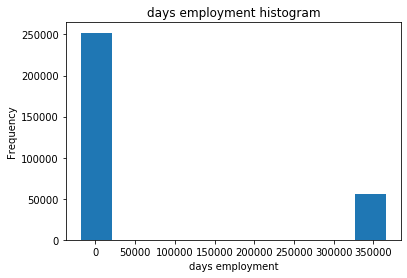

In [26]:
app_train['DAYS_EMPLOYED'].plot.hist(title='days employment histogram')
plt.xlabel('days employment')

비정상 고객이 정상 고객에 비해 **대출상환 비율이 더 높은지 낮은지** 살펴보자.

In [28]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('the non-anomalies default on {:.2f}% of loans.'.format(100*non_anom['TARGET'].mean()))
print('the anomalies default on {:.2f}% of loans.'.format(100*anom['TARGET'].mean()))
print('there are {} anomalies days of employment.'.format(len(anom)))

the non-anomalies default on 8.66% of loans.
the anomalies default on 5.40% of loans.
there are 55374 anomalies days of employment.


**비정상 고객이 대출상환 비율이 더 낮은 것**으로 나타나고 있다.

비정상 데이터를 다루는 것은 정해진 규칙이 없으며 상황에 따라 달라진다. 가장 안전한 방법 중 하나는 **학습 전에 비정상 데이터의 값을 missing value로 변환하고 Imputation을 통해 채우는 것**이다. 이러한 경우 모든 비정상 데이터들이 같은 값을 가지기 때문에, 모든 대출이 공통적으로 공유될 경우(?)에 대비하여 모두 같은 값으로 채울 것이다. (비정상 데이터 값이 위에서 보면 365243이니까 missing value도 같은 값으로 채워도 괜찮다는 뜻인듯)

비정상 데이터들도 어느정도 중요하기 때문에 머신러닝 모델에 이 값들을 채웠는지 말해주고 싶을 것이다. 이에 대한 해결책으로 **비정상 데이터의 값을 NaN으로** 채우고 **`boolean` column**을 만들어 이 값이 비정상인지 아닌지 나타낼 수 있다.

Text(0.5, 0, 'days employment')

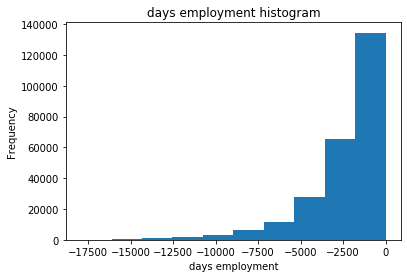

In [31]:
#  anomalous flag column 생성
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243

# anomalous value를 nan으로 변환
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

app_train['DAYS_EMPLOYED'].plot.hist(title='days employment histogram')
plt.xlabel('days employment')

분포(distribution)는 예상했던 것과 거의 일치하고 모델에게 이 value가 비정상적인 건이 알려주는 새로운 column도 생성하였다. (nan값으로 변환하였고 feature engineering 때 아마 median값으로 대체될 것임) `DAYS`라는 이름을 가지느 다른 column도 눈에 띄는 이상치(outlier)가 없는 것으로 보인다.

정말 정말 중요! **우리가 train data에서 수행한 작업은 test data에서도 똑같이 해줘야 한다.** test data도 동일하게 새로운 column을 만들고 기존 column에 `np.nan`으로 채워주자.

In [33]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED'] == 365243
app_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

print('there are {} anomalies in the test data out of {} entries'.format(
    app_test['DAYS_EMPLOYED_ANOM'].sum(), len(app_test)))

there are 9274 anomalies in the test data out of 48744 entries


#### 4.5.2. Correlations
categorical variable과 이상치에 대한 처리가 끝났다! 이제 다시 EDA로 돌아가보자. 데이터를 이해하는 방법 중 하나는 **feature와 target 간의 상관관계**를 확인하는 것이다. dataframe의 `corr` 함수르르 사용해 각 variable과 target 간의 피어슨 상관계수를 계산할 수 있다.

상관계수는 feature의 연관성(relevance)를 표현하기 위한 아주 좋은 방법은 아니지만 데이터 간의 생각해볼만한 관계에 대한 아이디어를 던져준다. 일반적으로 상관계수의 값은 다음과 같이 인식된다:
* `.00 - .19` : 매우 낮음
* `.20 - .39` : 낮음
* `.40 - .59` : 보통
* `.60 - .79` : 높음
* `.80 - 1.0` : 매우 높음

In [34]:
# target과의 상관계수를 기준으로 정렬
correlations = app_train.corr()['TARGET'].sort_values()

print('most positive correlations :\n', correlations.tail(15))
print('\nmost negative correlations :\n', correlations.head(15))

most positive correlations :
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

most negat